In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import KMeans

# Get the current working directory
current_dir = os.getcwd()


In [17]:
# Append the parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from scripts.utils import *
from scripts.data_visualization import *
from scripts.userExperienceAnalysis import *
# ignore warrnings
import warnings
warnings.filterwarnings("ignore")
from db.dbConnections import PostgresConnection

In [18]:
db=PostgresConnection()
db.connect()

query='select * from xdr_data'
db.execute_query(query)


Connected to PostgreSQL database
Query executed successfully


In [19]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [21]:
   # Handle missing values
columns_to_fill = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
df = handle_missing_values(df, columns_to_fill)

In [22]:
    # Handle outliers
df = handle_outliers(df, columns_to_fill)

In [23]:
# Aggregate data per customer
aggregated_data = aggregate_per_customer(df)
aggregated_data.to_csv('aggregated_user_experience.csv', index=False)

In [27]:
    # Compute top, bottom, and most frequent values for key metrics
metrics = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
for metric in metrics:
        results = compute_top_bottom_frequent(df, metric)
        print(f"Top, bottom, and most frequent values for {metric}: {results}")

Top, bottom, and most frequent values for TCP DL Retrans. Vol (Bytes): {'top_10': 121394    372356204.0
121428    372210984.0
61577     369958724.0
79902     368643528.0
105580    367686534.0
42579     366414808.0
37822     366148436.0
787       365950245.0
61162     363955072.0
61548     363750572.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'bottom_10': 59710     2.0
125094    2.0
2834      4.0
39613     4.0
52487     4.0
60367     4.0
60419     4.0
75087     4.0
100353    4.0
143448    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'most_frequent': TCP DL Retrans. Vol (Bytes)
2.080991e+07    88684
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: count, dtype: int64}
Top, bottom, and most frequent values for TCP UL Retrans. Vol (Bytes): {'top_10': 36905     47821286.0
141313    47288459.0
37255     47206844.0
40576 

In [28]:
    # Analyze distribution
throughput_distribution, tcp_retransmission_distribution = analyze_distribution(aggregated_data)

In [29]:
print("Throughput distribution per handset type:")
print(throughput_distribution)

print("TCP retransmission distribution per handset type:")
print(tcp_retransmission_distribution)

Throughput distribution per handset type:
                                                    Avg_Throughput_DL  \
Most_Frequent_Handset_Type                                              
A-Link Telecom I. Cubot A5                               23184.000000   
A-Link Telecom I. Cubot Note Plus                         6527.000000   
A-Link Telecom I. Cubot Note S                            8515.000000   
A-Link Telecom I. Cubot Nova                             55667.000000   
A-Link Telecom I. Cubot Power                            69126.000000   
...                                                               ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...          44.500000   
Zyxel Communicat. Lte7460                                39741.000000   
Zyxel Communicat. Sbg3600                                82818.000000   
Zyxel Communicat. Zyxel Wah7706                           1263.000000   
undefined                                                 6464.934244   

        

<Figure size 1400x700 with 0 Axes>

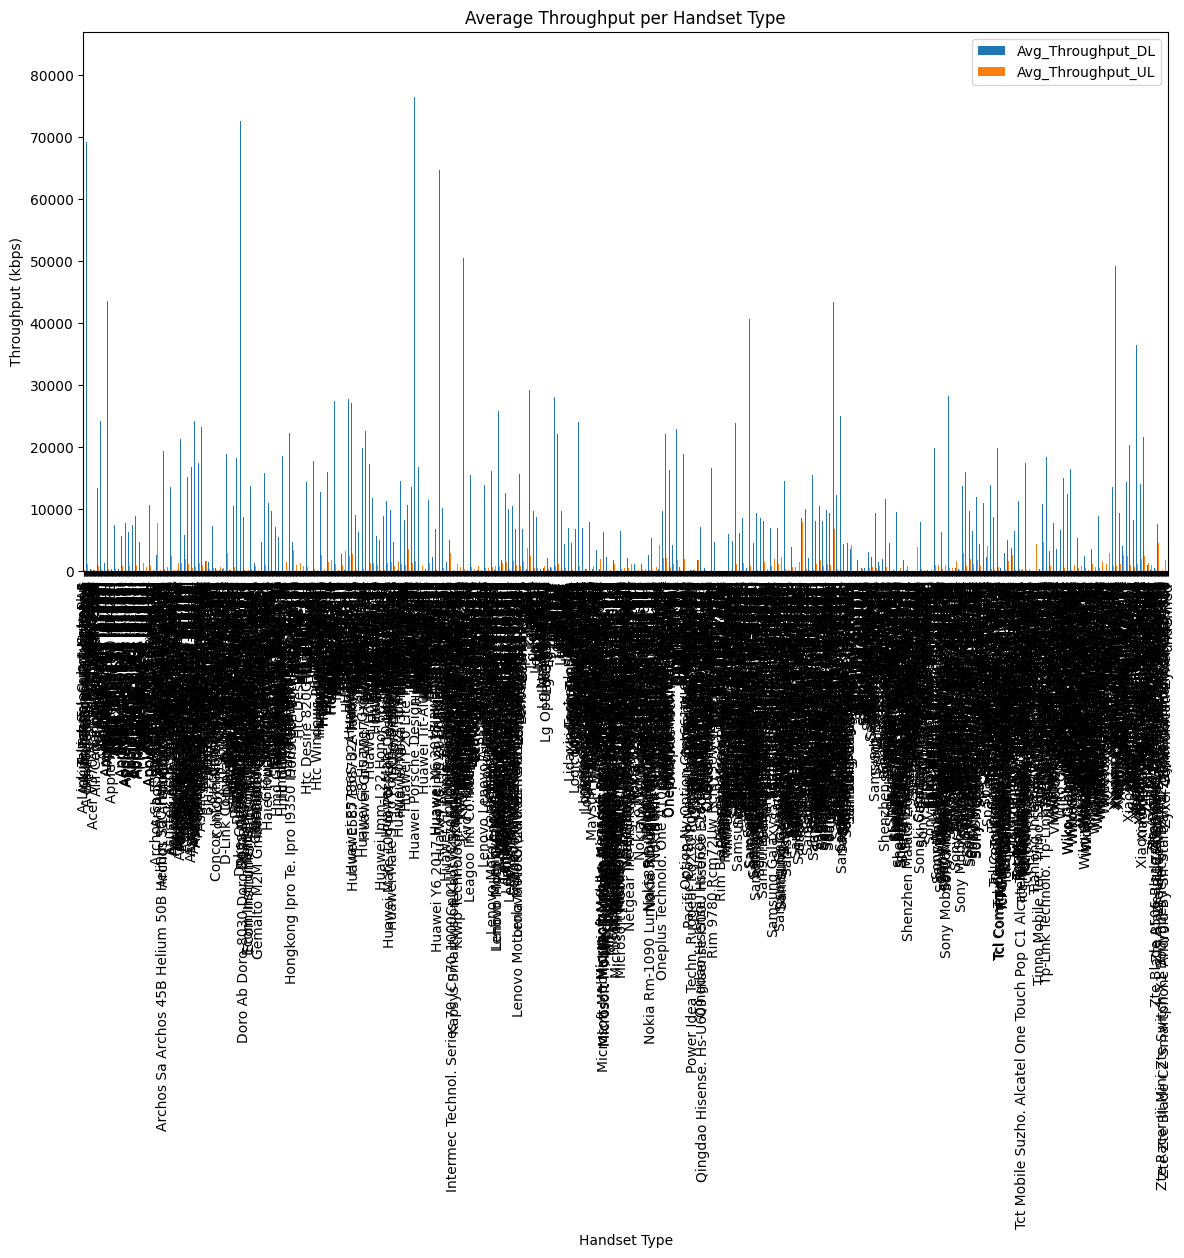

<Figure size 1400x700 with 0 Axes>

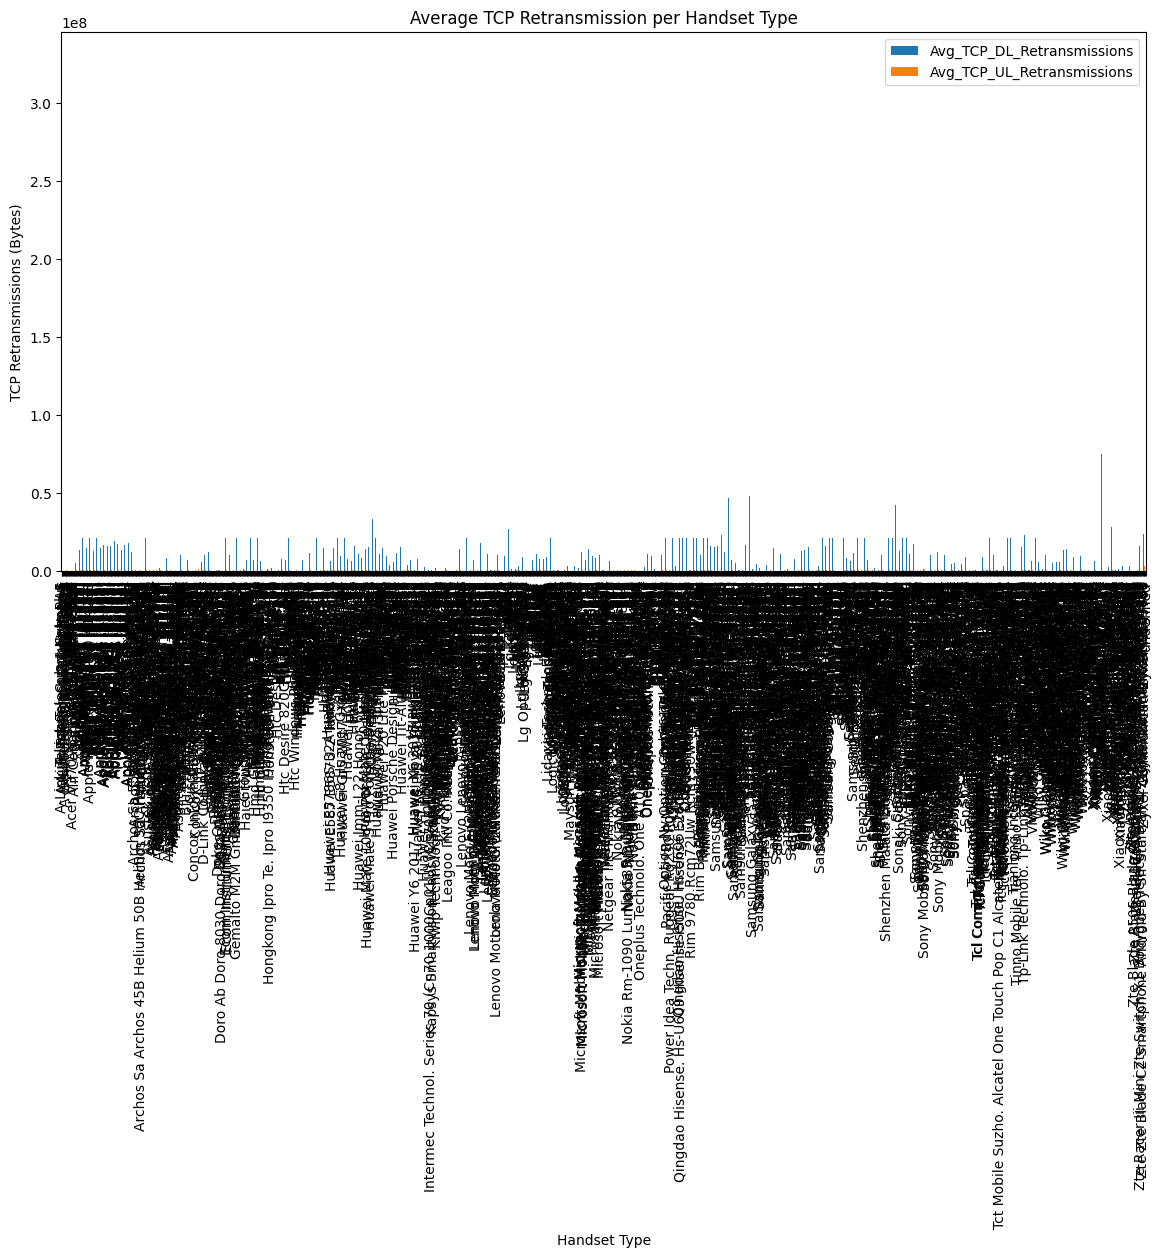

In [30]:
# Visualize distributions
plot_distribution(throughput_distribution, "Average Throughput per Handset Type", "Handset Type", "Throughput (kbps)")
plot_distribution(tcp_retransmission_distribution, "Average TCP Retransmission per Handset Type", "Handset Type", "TCP Retransmissions (Bytes)")


In [32]:
  # Perform K-Means clustering
aggregated_data, cluster_analysis = perform_kmeans_clustering(aggregated_data, n_clusters=3)

In [33]:
print("Cluster analysis:")
print(cluster_analysis)

Cluster analysis:
         Avg_TCP_DL_Retransmissions  Avg_TCP_UL_Retransmissions  Avg_RTT_DL  \
Cluster                                                                       
0                      1.748103e+07               668468.520046   88.563845   
1                      5.383041e+06               239452.938141   82.141497   
2                      2.829317e+07               969403.785557  112.315445   

         Avg_RTT_UL  Avg_Throughput_DL  Avg_Throughput_UL  
Cluster                                                    
0          9.051700        1661.674628         207.093357  
1         15.926890       30450.396615        2232.603859  
2         52.901612       35692.183213        6576.323300  


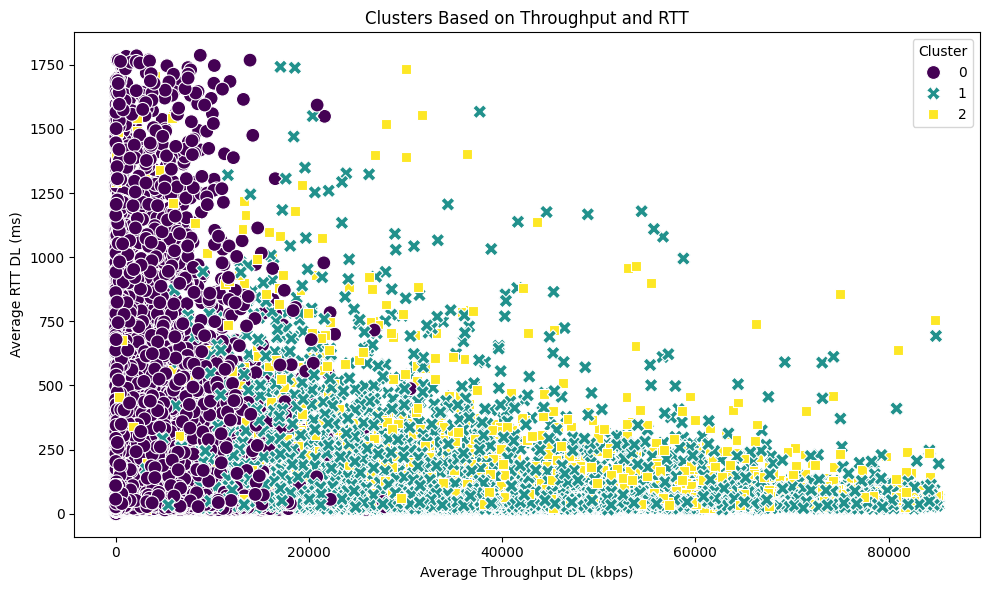

In [34]:
  # Visualize clusters
plot_clusters(aggregated_data)

In [ ]:
 # Save results
cluster_analysis.to_csv('../data/cluster_analysis.csv', index=False)
print("Cluster analysis results saved to 'data/cluster_analysis.csv'.")

Cluster analysis results saved to 'data/cluster_analysis.csv'.
